##### Problem 1
Cold Storage started its operations in Jan 2016. They are in the business of storing Pasteurized Fresh
Whole or Skimmed Milk, Sweet Cream, Flavoured Milk Drinks. To ensure that there is no change of
texture, body appearance, separation of fats the optimal temperature to be maintained is between 2º - 4º
C.
In the first year of business, they outsourced the plant maintenance work to a professional company with stiff
penalty clauses. It was agreed that if it was statistically proven that the probability of temperature going
outside the 2º - 4º C during the one-year contract was above 2.5% and less than 5% then the penalty would
be 10% of AMC (annual maintenance case). In case it exceeded 5% then the penalty would be 25% of the
AMC fee. The average temperature data at the date level is given in the file
“Cold_Storage_Temp_Data_.csv

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
# load the dataset

cold_storage_df = pd.read_csv("Cold_Storage_Temp_Data_.csv")

In [17]:
cold_storage_df.head()

,Season,Month,Date,Temperature
0,Winter,Jan,1,2.3
1,Winter,Jan,2,2.2
2,Winter,Jan,3,2.4
3,Winter,Jan,4,2.8
4,Winter,Jan,5,2.5


In [4]:
# Information Of the dataset

cold_storage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Season        365 non-null    object 
 1   Month         365 non-null    object 
 2   Date          365 non-null    int64  
 3   Temperature   365 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 11.5+ KB


In [5]:
# Description of the dataset
cold_storage_df.describe()

,Date,Temperature
count,365.000000,365.000000
mean,15.720548,3.002466
std,8.808321,0.465832
min,1.000000,1.700000
25%,8.000000,2.700000
50%,16.000000,3.000000
75%,23.000000,3.300000
max,31.000000,4.500000


In [6]:
# Checking for Missing Values
cold_storage_df.isnull().sum()

Season          0
Month           0
Date            0
Temperature     0
dtype: int64

#### Univariate Analysis

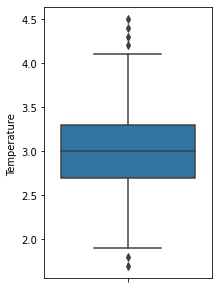

In [7]:
plt.figure(figsize=(3,5))
sns.boxplot(y = cold_storage_df["Temperature "]); 

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


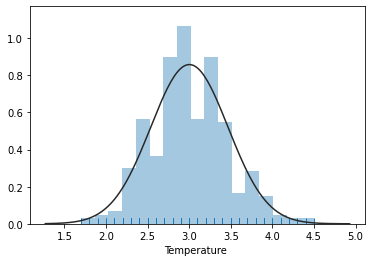

In [8]:
temp_plot = sns.distplot(cold_storage_df['Temperature '], fit=norm, kde=False,rug=True, hist=True)

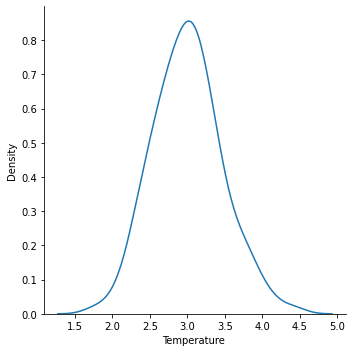

In [9]:
sns.displot(cold_storage_df, x="Temperature ", kind="kde")

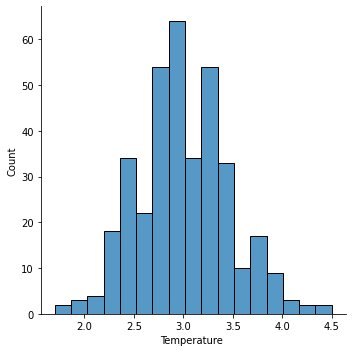

In [10]:
sns.displot(cold_storage_df, x="Temperature ")

##### Bivariate Analysis

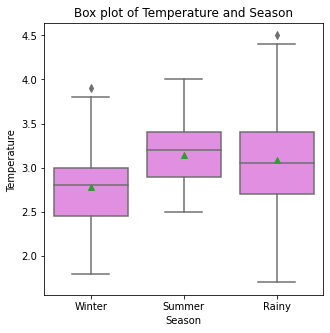

In [11]:
fig = plt.figure(figsize=(5,5))
sns.boxplot(x='Season',y='Temperature ',color="violet",showmeans=True,data=cold_storage_df).set_title('Box plot of Temperature and Season')
plt.show()

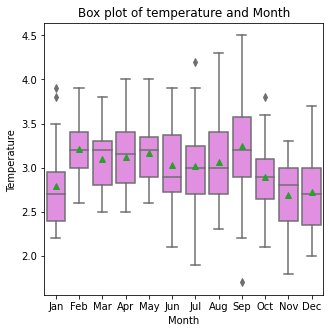

In [12]:
fig = plt.figure(figsize=(5,5))
sns.boxplot(x='Month',y='Temperature ',color="violet",showmeans=True,data=cold_storage_df).set_title('Box plot of temperature and Month')
plt.show()

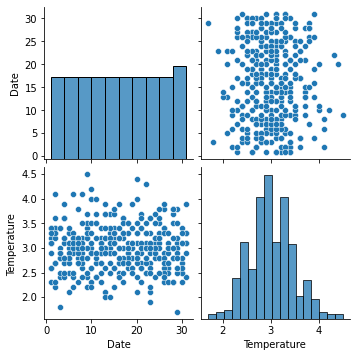

In [13]:
sns.pairplot(cold_storage_df)

<AxesSubplot:xlabel='Temperature ', ylabel='Date'>

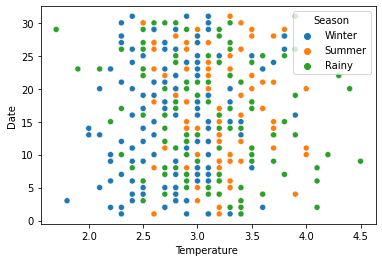

In [14]:
sns.scatterplot(x="Temperature ",
                    y="Date",
                    hue="Season",
                    
                    data=cold_storage_df)

##### 1. Find mean cold storage temperature for Summer, Winter, and Rainy Season. (7 marks)

In [15]:
cold_storage_mean_temp_summer = cold_storage_df[cold_storage_df['Season'] == 'Summer']['Temperature '].mean() 

summer_std = cold_storage_df[cold_storage_df['Season'] == 'Summer']['Temperature '].std()

cold_storage_mean_temp_winter = cold_storage_df[cold_storage_df['Season'] == 'Winter']['Temperature '].mean()

winter_std = cold_storage_df[cold_storage_df['Season'] == 'Winter']['Temperature '].std()

cold_storage_mean_temp_rainy = cold_storage_df[cold_storage_df['Season'] == 'Rainy']['Temperature '].mean()

rainy_std = cold_storage_df[cold_storage_df['Season'] == 'Rainy']['Temperature '].std()


In [16]:
print('For Summer ===>> Average: {}\t Stdandard Deviation: {}'.format(cold_storage_mean_temp_summer, summer_std))

print('For Winter ===>> Average: {}\t Stdandard Deviation: {}'.format(cold_storage_mean_temp_winter, winter_std))

print('For Rainy ===>> Average: {}\t Stdandard Deviation: {}'.format(cold_storage_mean_temp_rainy, rainy_std))






For Summer ===>> Average: 3.1475	 Stdandard Deviation: 0.3516975639247282
For Winter ===>> Average: 2.776422764227643	 Stdandard Deviation: 0.4143098746885324
For Rainy ===>> Average: 3.0877049180327876	 Stdandard Deviation: 0.5272065583642


##### Inference:
    From the dataset under analysis, it can be observed that the highest average temperature is being clocked for the season
    of Summer, whereas the lowest is for Winter. 
    Although once can assume this to match the natural ambient temperatures of different seasons, 
    statistically we cannot draw a conclusion due to the lack of weather data across the year.

##### 2. Find the overall mean for the full year. (7 marks)


In [60]:

avg_temp = cold_storage_df['Temperature '].mean()

print('The Overall mean for the full year is : ', avg_temp )

The Overall mean for the full year is :  3.0024657534246546


##### 3. Find Standard Deviation for the full year. (7 marks)


In [61]:
std_dev = cold_storage_df['Temperature '].std()

print('The Standard Deviation for the full year is : ', std_dev )

The Standard Deviation for the full year is :  0.4658319416510761


##### 4. Assume Normal distribution, what is the probability of temperature having fallen below 2º C? (7 marks)

X ~ Normal ( 𝜇 = 3.0024 , 𝜎 = 0.4658)

In [62]:
import scipy.stats as stats

print('The Probability of temperature having fallen below 2º C i.e. P(X < 2): ', stats.norm.cdf(2,3.0024,0.4658))

The Probability of temperature having fallen below 2º C i.e. P(X < 2):  0.015698812451913943


In [63]:
# ALternate Method
#  standardize value to compare: (X - mean)/std
stand_value = (2-avg_temp)/std_dev
p = norm.cdf(stand_value)
print("Probability P(X < 2): {}".format(p))

Probability P(X < 2): 0.015699064791364483


##### 5. Assume Normal distribution, what is the probability of temperature having gone above 4º C? (7 marks)

X ~ Normal ( 𝜇  = 3.0024 ,  𝜎  = 0.4658)

In [64]:
stand_value = (4-avg_temp)/std_dev
p_4 = norm.cdf(stand_value)

# p = 1-p because it asks for the probability ABOVE
p_4 = 1 - p_4
print("Probability P(X > 4): ", round((p_4 * 100),4))
# print("Probability P(X > 4): {}".format(p_4))


Probability P(X > 4):  1.6121


In [65]:
print('The probability of temperature having gone above 4º C i.e Probability P(X > 4): ',1 - stats.norm.cdf(4,3.0024,0.4658))

The probability of temperature having gone above 4º C i.e Probability P(X > 4):  0.01610914900095306


##### 6. What will be the penalty for the AMC Company? (5 marks)

In [66]:
penalty = p + p_4

print("Probability total : ", round((penalty *100),4))

# print("Probability total: {}".format(penalty))

Probability total :  3.182


Let’s say,

P(OT) = Probability of temperature between 2ºC - 4º C,

Where OT = temperature in the range of 2ºC - 4º C

Since sum of the total area under the curve = 1 

probability of temperature outside of range of 2ºC - 4º C = 1- P(OT)

From data analysis through python (attached separately), we know the
following

P(OT) = 96.82% i.e Probability of temperature between 2ºC - 4º C = 96.82%

So, The probability of temperature outside the range of 2ºC - 4º C = (100%-
96.82%) ~ 3.18%

Statistically the probability of temperature going outside the 2ºC - 4º C during the one-year contract was 3.18% (between 2.5% and 5% ), so a penalty be of 10% should be applicable to AMC company (annual maintenance case)


##### Problem 2:
In Mar 2018, Cold Storage started getting complaints from their clients that they have been getting complaints from
end consumers of the dairy products going sour and often smelling. On getting these complaints, the supervisor
pulls out data of the last 35 days’ temperatures. As a safety measure, the Supervisor has been vigilant to maintain
the mean temperature 3.9º C or below.
Assume 3.9º C as the upper acceptable mean temperature and at alpha = 0.1 do you feel that there is a
need for some corrective action in the Cold Storage Plant or is it that the problem is from the procurement
side from where Cold Storage is getting the Dairy Products. The data of the last 35 days is in
“Cold_Storage_Mar2018_.csv”

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import ttest_1samp


In [3]:
# load the dataset

cold_storage_mar_2018_df = pd.read_csv("Cold_Storage_Mar2018_.csv")

In [4]:
cold_storage_mar_2018_df.head()

,Season,Month,Date,Temperature
0,Summer,Feb,11,4.0
1,Summer,Feb,12,3.9
2,Summer,Feb,13,3.9
3,Summer,Feb,14,4.0
4,Summer,Feb,15,3.8


In [5]:
# Information Of the dataset

cold_storage_mar_2018_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Season       35 non-null     object 
 1   Month        35 non-null     object 
 2   Date         35 non-null     int64  
 3   Temperature  35 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.2+ KB


In [6]:
# Description of the dataset
cold_storage_mar_2018_df.describe()

,Date,Temperature
count,35.000000,35.000000
mean,14.400000,3.974286
std,7.389181,0.159674
min,1.000000,3.800000
25%,9.500000,3.900000
50%,14.000000,3.900000
75%,19.500000,4.100000
max,28.000000,4.600000


In [7]:
# Checking for Missing Values
cold_storage_mar_2018_df.isnull().sum()

Season         0
Month          0
Date           0
Temperature    0
dtype: int64

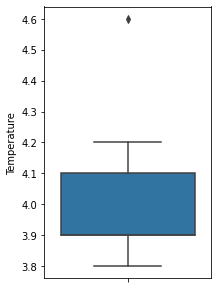

In [8]:
plt.figure(figsize=(3,5))
sns.boxplot(y = cold_storage_mar_2018_df["Temperature"]); 

Inference: 
    It has outliers

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


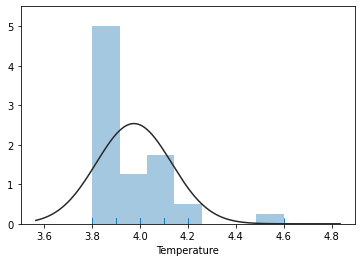

In [35]:
temp_plot = sns.distplot(cold_storage_mar_2018_df['Temperature'], fit=norm, kde=False,rug=True, hist=True)

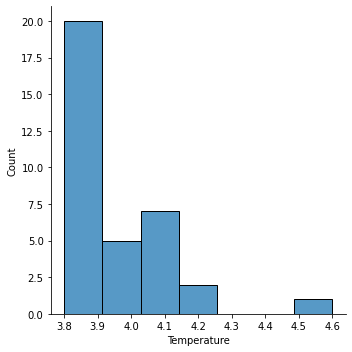

In [57]:
sns.displot(cold_storage_mar_2018_df, x="Temperature")

##### 1. Which Hypothesis test shall be performed to check if corrective action is needed at the cold storage plant? Justify your answer. (6 marks)


Hypothesis will be defined for both Z and T test as (both will carry the same hypothesis)

Sample size = n = 35 days temperatures

H0 mu <= 3.9 , hypothesized value of mean population (Upper acceptable mean temperature 3.9 )

H1 mu > 3.9 , alternative hypothesis (The mean temperature of the storage could be greater than 3.9 C)

Null hypothesis, H0 = Average temperature will be less than or equivalent to upper limit of 3.9 degC

Alternate hypothesis, H1 = Average temp has risen more than 3.9 degC

Alpha(𝛼) = 0.1

SD - Not known 

In [10]:
cold_storage_mar_2018_df.describe()

,Date,Temperature
count,35.000000,35.000000
mean,14.400000,3.974286
std,7.389181,0.159674
min,1.000000,3.800000
25%,9.500000,3.900000
50%,14.000000,3.900000
75%,19.500000,4.100000
max,28.000000,4.600000


##### Observation : 
    
  Max temperature has 4.6 C starting with 4.1 from 3rd Quartile. This indicates that sometimes the temperature has gone higher.
    
  Also we can see that the sample size is small and we don’t know the standard deviation of the population. 
    
  Also as the sample size is greater than 35, as per central Limit theorem, the sample distribution would be a normal distribution. 
    
   So we can use one sample z-test in this case.

In [11]:
import math
from math import sqrt

##### Step 1: Define null and alternative hypotheses

H0 mu <= 3.9 , hypothesized value of mean population (Upper acceptable mean temperature 3.9 )

H1 mu > 3.9 , alternative hypothesis (The mean temperature of the storage could be greater than 3.9 C)

Null hypothesis, H0 = Average temperature will be less than or equivalent to upper limit of 3.9 degC

Alternate hypothesis, H1 = Average temp has risen more than 3.9 degC

##### Step 2: Decide the significance level

alpha(𝛼) = 0.1

In [12]:
sample_size = len(cold_storage_mar_2018_df)

print("The sample size for this problem is " ,sample_size)

The sample size for this problem is  35


##### Step 3: Identify the test statistic

Step 3: Identify the test statistic

H0: mu<=3.9
H1: mu>3.9

One tailed one sample test

For Z test, population standard deviation is required to calculate test statistic. If our population standard deviation is unknown but sample size greater than equal to 30, we can invoke the Central Limit Theorem and use the test statistic: 
as z =(avg_temp_1-mu)/(std_dev/(sqrt(sample_size))), here std_dev is the sample standard deviation. Here sample_size=35, hence we can use sample standard deviation to calculate z score (test statistic)


##### Step 4: Calculate the z-score and z-critical

In [13]:
avg_temp_1 =cold_storage_mar_2018_df['Temperature'].mean()

print('The average temperature is : ',avg_temp_1)

The average temperature is :  3.974285714285715


In [14]:
std_dev =cold_storage_mar_2018_df['Temperature'].std()

print('The Standard Deviation for the temperature is : ',std_dev)

The Standard Deviation for the temperature is :  0.15967403771223337


In [29]:
mu=3.9

zscore=(avg_temp_1-mu)/(std_dev/(np.sqrt(sample_size)))

print(('z score is',round(zscore,4)))



('z score is', 2.7524)


In [16]:
from scipy import stats
alpha=0.1

z_critical = stats.norm.ppf(1 - alpha)
print('z Critical value is : ',z_critical)

z Critical value is :  1.2815515655446004


In [17]:
if zscore < z_critical:
    print("We Reject NULL hypothesis as for lower tail if Z score less than - z critical.")
else:
    print("We Fail to Reject NULL hypothesis as for lower tail Z score greater than - z critical.")
    

We Fail to Reject NULL hypothesis as for lower tail Z score greater than - z critical.


Since z-statistic value = 2.75 is greater than z-critical value of 1.28 at significance level alpha =0.1 
Hence we Fail to Reject the null hypotheis .
We accept the Alternate hypothesis that temperature has indeed risen more than 3.9 degC

##### Calculating  p_value based on z score

In [31]:
p_value_z=stats.norm.cdf(zscore)
print('p-value based on z-score is : ',round(p_value_z, 4))


p-value based on z-score is :  0.997


In [21]:
if p_value_z < alpha:
    print("We Reject NULL hypothesis as p value < level of significance")
else :
    print("We Fail to Reject NULL hypothesis as p value is greater than level of significance")


We Fail to Reject NULL hypothesis as p value is greater than level of significance


##### 2. State the Hypothesis and do the necessary calculations to accept or reject the corresponding null hypothesis. (8 marks)

The sample size of 35 days is optimum enough to conduct both z and t tests And at this optimum size we find that t-statistic value and z-statistic value 

##### Step 1 : Define the Null or Alternative Hypothesis

Hypothesis will be defined for both Z and T test

Sample size = n = 35 days temperatures

H0 mu <= 3.9 , hypothesized value of mean population (Upper acceptable mean temperature 3.9 )

H1 mu > 3.9 , alternative hypothesis (The mean temperature of the storage could be greater than 3.9 C)

Null hypothesis, H0 = Average temperature will be less than or equivalent to upper limit of 3.9 degC

Alternate hypothesis, H1 = Average temp has risen more than 3.9 degC

aplha(𝛼) = 0.1

Standard Deviation - Not known

##### Step 2: Decide the significance level

Here we select  alpha  = 0.1

In [22]:
print("The sample size for this problem is",len(cold_storage_mar_2018_df))

The sample size for this problem is 35


##### Step 3: Identify the test statistic

We do not know the population standard deviation and n = 35. So we use the t distribution and the  𝑡𝑆𝑇𝐴𝑇  test statistic.

##### Step 4: Calculate the p - value and test statistic

In [32]:
# one sample t-test

temperatures = list(cold_storage_mar_2018_df['Temperature'])

t_statistic, p_value = ttest_1samp(temperatures, 3.9)

print('One sample t test \n t_statistic: {0}\t p value: {1} '.format(t_statistic, p_value))

# print("P_value found: {}".format(p_value))


One sample t test 
 t_statistic: 2.752358609800241	 p value: 0.009422395404264431 


In [25]:
# t-distribution Percent Point Function
from scipy.stats import t
# define probability
p = 0.90
df = 35
# retrieve value <= probability
t_critical_value = t.ppf(p, df)
print('The t-critical vaue is : ',t_critical_value)


The t-critical vaue is :  1.3062118007176513


##### t score will be same as z score as for calculating z score we have applied central limit theorem and have used sample standard deviation as population standard deviation is not available.


##### Step 5 Decide to reject or accept null hypothesis

In [26]:
if p_value < alpha :
    print("We Reject NULL hypothesis as p value < level of significance")
else :
    print("We Fail to Reject NULL hypothesis as p value is greater than level of significance")


We Reject NULL hypothesis as p value < level of significance


With 90% confidence, there is not sufficient evidence to prove that the mean maintained temperature of milk is equal to upper limit of 3.9degC.

##### 3. Give your inference. (6 marks)


##### Both the tests ( z as well as t ) proved that Temperature had been well over 3.9 degC against the claims of Supervisor who had been vigilant about not breaching the 3.9 degC

The sample size of 35 days is optimum enough to conduct both z and t tests And at this optimum size we find that t-statistic value and z-statistic value are almost similar that is ,

t-statistic = z-statistic = 2.75 ( another striking similarity to reject the Null hypotheis )

Since p value, is less than alpha = 0.1, we will reject the NULL Hypothesis, With 90% confidence we can say that , there is a problem with the Cold Storage and there is a need for some Corrective action in the Cold Storage plant.

Using both z test and t test we fail to reject null hypothesis,so we can conlude that there is need of some corrective action in the cold storage plant.


True mean is greater than 3.9. Hence from the hypothesis testing , statistically it says that the population mean could be higher than 3.9 C. Alternate hypothesis is True

Since p value, is less than alpha = 0.1, we will reject the NULL Hypothesis, With 90% confidence we can say that , there is a problem with the Cold Storage and there is a need for some Corrective action in the Cold Storage plant.

So H0 can be rejected. Null hypothesis is rejected and the storage temperature is greater than 3.9 C. Ha
– Alternate hypothesis is accepted

The inference is that temperature of the storage could go higher than 3.9 C. If the Cold storage can maintain the temperature below 3.9 C , the problem will be resolved. 